In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import seaborn as sns



In [2]:
df = pd.read_csv("../data/cleanedData.csv")

In [3]:
X = df.drop(['label'], axis=1)
y = df['label']

In [4]:
X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.4, random_state=1)

In [5]:
X_valid, X_test, y_valid, y_test = train_test_split(X_testvalid, y_testvalid, train_size=0.5, random_state=1)

In [6]:
binary_cols = ['urls', 'generalConsumer', 'govDomain', 'eduDomain', 'orgDomain', 'netDomain', 'otherDomain', 'html']
cont_cols = ['punctuationCount', 'subjectLength', 'bodyLength', 'totalLength']

In [7]:
def to_csr(x):
    return csr_matrix(x)

In [8]:
binary_transformer = FunctionTransformer(func=to_csr, accept_sparse=True)

In [9]:
ct = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'fullContent'),
        ('binary', binary_transformer, binary_cols),
        ('cont', StandardScaler(), cont_cols)
    ],
)


In [10]:
transformed_X_train = ct.fit_transform(X_train)
transformed_X_valid = ct.transform(X_valid)
transformed_X_test = ct.transform(X_test)

In [21]:
randf = RandomForestClassifier(n_estimators=50)
randf.fit(transformed_X_train, y_train)
train_pred = randf.predict(transformed_X_train)



In [12]:
def printCM(predictLabels, trueLabels):
    class_report = classification_report(trueLabels, predictLabels)
    print(class_report)

    cm = confusion_matrix(trueLabels, predictLabels)

    # Define class labels for the confusion matrix (for binary classification)
    class_labels = ['Phishing', 'Non-Phishing']  # Adjust according to your classes

    # Create the heatmap without annotations (annot=False)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False)

    # Set axis labels
    ax.set_xlabel('True', fontsize=12)
    ax.set_ylabel('Predicted', fontsize=12)

    # Set the class labels on the axes
    ax.set_xticklabels(class_labels, fontsize=10)
    ax.set_yticklabels(class_labels, fontsize=10)

    # Set title
    plt.title('Confusion Matrix')

    # Manually add True Positive, False Positive, True Negative, and False Negative annotations
    # You must use the exact cell positions for each term in the 2x2 confusion matrix
    ax.text(0.5, 0.5, 'TP\n(' + str(cm[1, 1]) + ')', ha='center', va='center', fontsize=12)
    ax.text(1.5, 0.5, 'FP\n(' + str(cm[0, 1]) + ')', ha='center', va='center', fontsize=12)
    ax.text(0.5, 1.5, 'FN\n(' + str(cm[1, 0]) + ')', ha='center', va='center', fontsize=12)
    ax.text(1.5, 1.5, 'TN\n(' + str(cm[0, 0]) + ')', ha='center', va='center', fontsize=12)

    # Show the plot
    plt.tight_layout()
    return plt.show()

In [22]:
print('Model accuracy score with 50 decision-trees for training dataset: {0:0.4f}'. format(accuracy_score(y_train, train_pred)))

Model accuracy score with 50 decision-trees for training dataset: 1.0000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12481
           1       1.00      1.00      1.00     14093

    accuracy                           1.00     26574
   macro avg       1.00      1.00      1.00     26574
weighted avg       1.00      1.00      1.00     26574



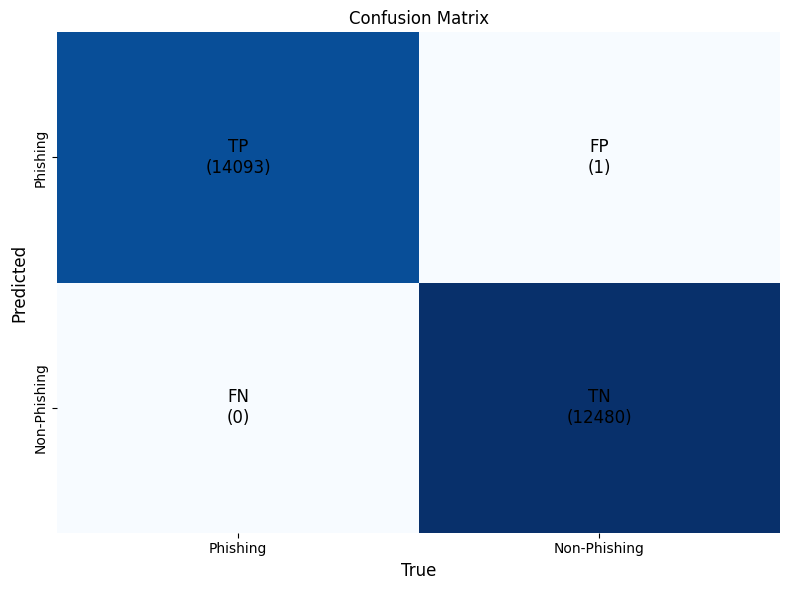

In [25]:
printCM(y_train, train_pred)

In [23]:
valid_pred = randf.predict(transformed_X_valid)
print(accuracy_score(y_valid, valid_pred))

0.9778731090539625


In [24]:
print("Train: ", transformed_X_train.shape)
print("Cross Validation: ", transformed_X_valid.shape)
print("Test:", transformed_X_test.shape) 

Train:  (26574, 192287)
Cross Validation:  (8858, 192287)
Test: (8858, 192287)


In [17]:
test_pred = randf.predict(transformed_X_test)

print('Model accuracy score with 50 decision-trees for test dataset: {0:0.4f}'. format(accuracy_score(y_test, test_pred)))

Model accuracy score with 10 decision-trees for test dataset: 0.9760


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4308
           1       0.96      0.99      0.98      4550

    accuracy                           0.98      8858
   macro avg       0.98      0.98      0.98      8858
weighted avg       0.98      0.98      0.98      8858



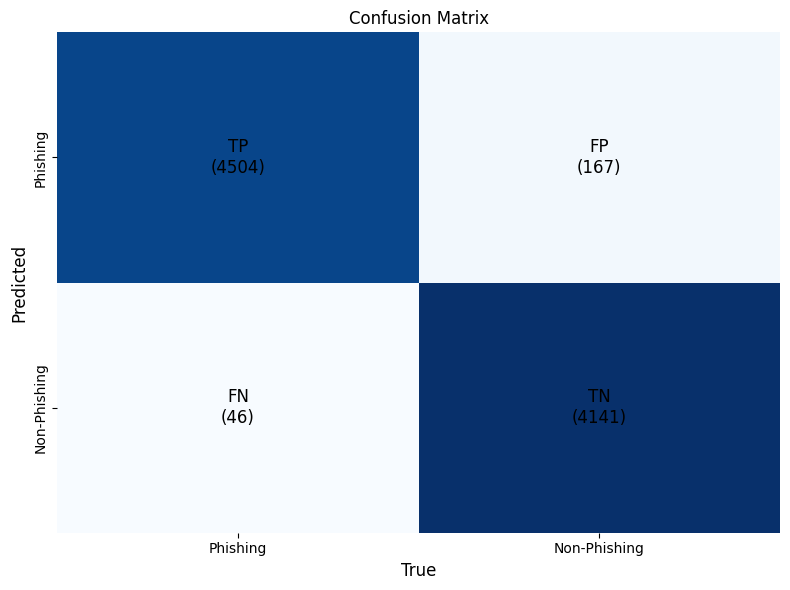

In [18]:
printCM(y_test, test_pred)